Nama: Muhammad Alim Ma'arij

NIM: H071201010

# 1. Classification

In [4]:
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv('gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [36]:
df1 = df.drop(['gender'],axis=1)
df1

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


## No Null Values

In [37]:
total_null = df1.isnull().sum().sort_values(ascending = False)
percent = ((df1.isnull().sum()/df1.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df1.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(16)

Total records =  5001


,Total Missing,In Percent
long_hair,0,0.0
forehead_width_cm,0,0.0
forehead_height_cm,0,0.0
nose_wide,0,0.0
nose_long,0,0.0
lips_thin,0,0.0
distance_nose_to_lip_long,0,0.0


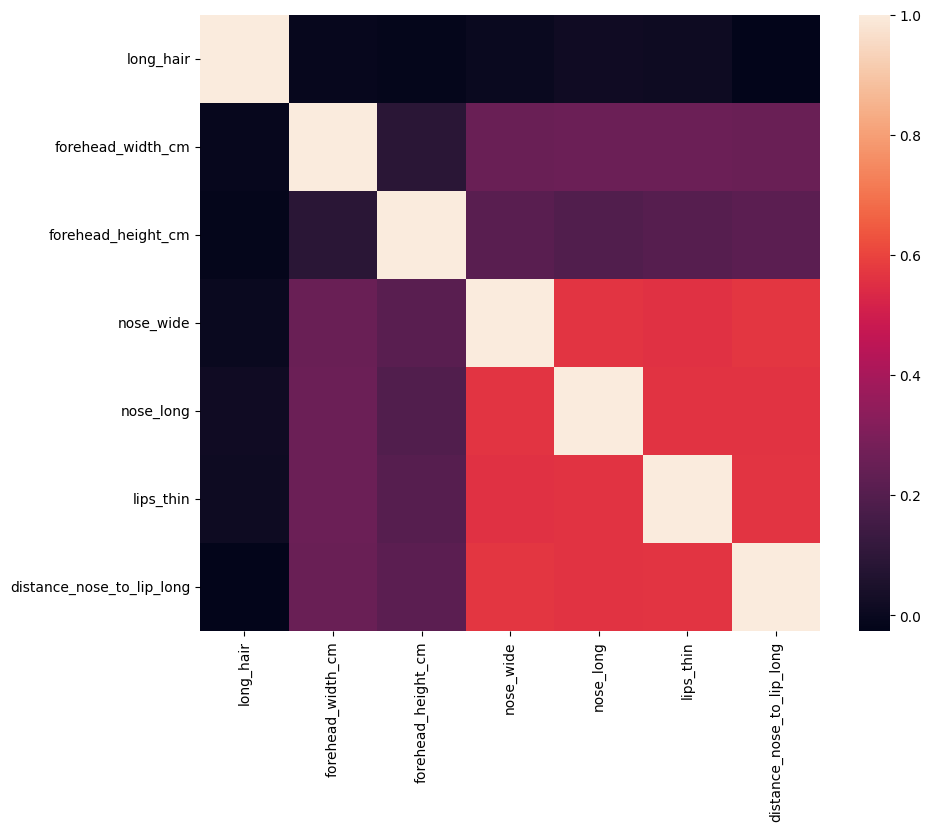

In [38]:
import seaborn as sns
corr = df1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr)
plt.show()

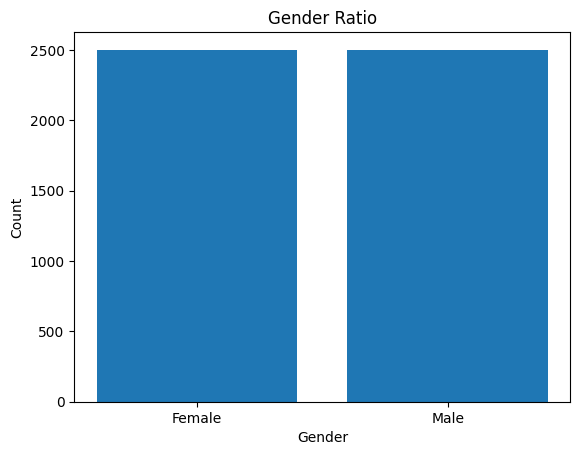

In [39]:
gender_count = df["gender"].value_counts()

plt.bar(gender_count.index, gender_count.values)
plt.title("Gender Ratio")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

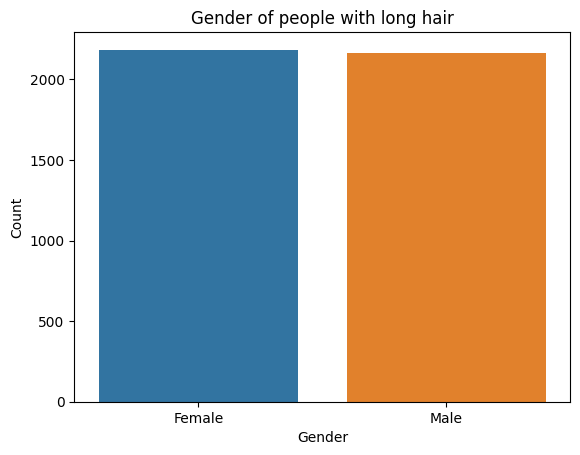

In [40]:
long_hair = df[df["long_hair"] == 1]


gender_count = long_hair["gender"].value_counts()


sns.barplot(x=gender_count.index, y=gender_count.values)
plt.title("Gender of people with long hair")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

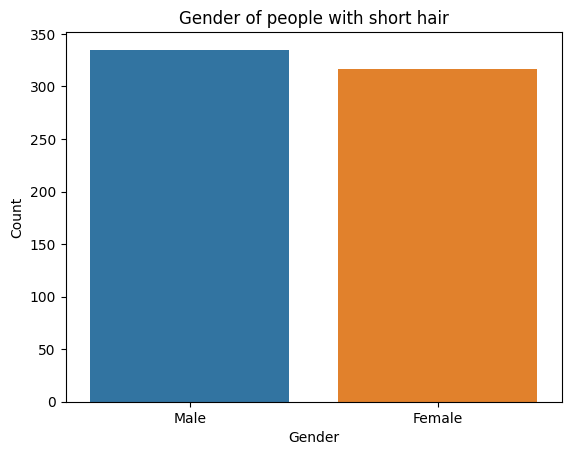

In [41]:
short_hair = df[df["long_hair"] == 0]


gender_count = short_hair["gender"].value_counts()


sns.barplot(x=gender_count.index, y=gender_count.values)
plt.title("Gender of people with short hair")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='nose_wide', ylabel='count'>

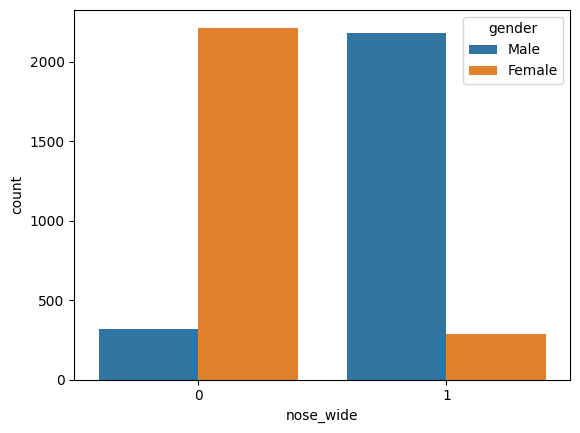

In [42]:
sns.countplot(x='nose_wide', hue='gender', data=df)

<Axes: xlabel='nose_long', ylabel='count'>

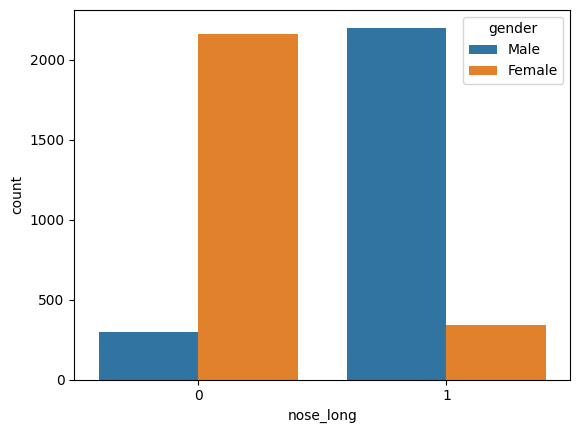

In [43]:
sns.countplot(x='nose_long', hue='gender', data=df)

## Model 1: KNN

In [44]:
features=df.copy()

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
X = features.drop('gender', axis=1)
y = features['gender']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
y_pred = knn.predict(X_test)

In [55]:
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_knn)

Accuracy: 0.978021978021978


### Evaluasi Model

In [57]:
from sklearn import metrics

k = 10
mean_acc = []
std_acc = []

for i in range(1,k):
    knn_method = KNeighborsClassifier(n_neighbors = i)
    knn_method.fit(X_train, y_train)
    y_pred_knn = knn_method.predict(X_test)
    mean_acc.append(metrics.accuracy_score(y_pred_knn, y_test))
    std_acc.append(np.std(y_pred_knn==y_test)/np.sqrt(y_pred_knn.shape[0]))
    
mean_acc

[0.9600399600399601,
 0.9590409590409591,
 0.965034965034965,
 0.9690309690309691,
 0.9660339660339661,
 0.971028971028971,
 0.965034965034965,
 0.968031968031968,
 0.9690309690309691]

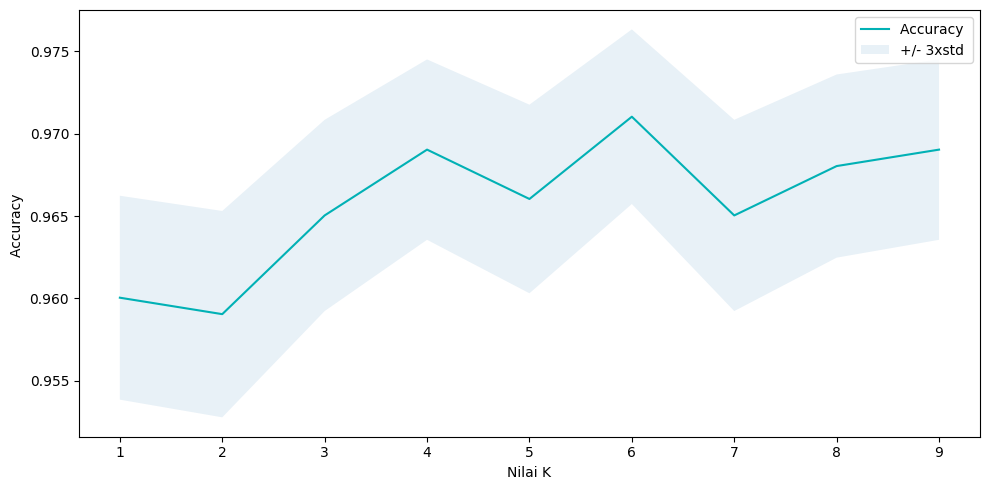

In [58]:
plt.figure(figsize = (10,5))
plt.plot(range(1,k),mean_acc, color='#01b1b5')
plt.fill_between(range(1,k),
                np.array(mean_acc) - 1 * np.array(std_acc),
                mean_acc + 1 * np.array(std_acc), 
                alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Nilai K')
plt.tight_layout()
plt.show()

In [59]:
print("Nilai Akurasi terbaik ada pada ", 
      round(np.array(mean_acc).max()*100,2), 
      "% dengan k = ", np.array(mean_acc).argmax()+1, sep='') 

Nilai Akurasi terbaik ada pada 97.1% dengan k = 6


## Model 2: Desicion Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier


features=df.copy()
X_train, X_test, y_train, y_test = train_test_split(features.drop('gender', axis=1), features['gender'], test_size=0.2)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
y_pred_tree = dtc.predict(X_test)


accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy_DT*100))

Accuracy: 97.80%


### Evaluasi Model

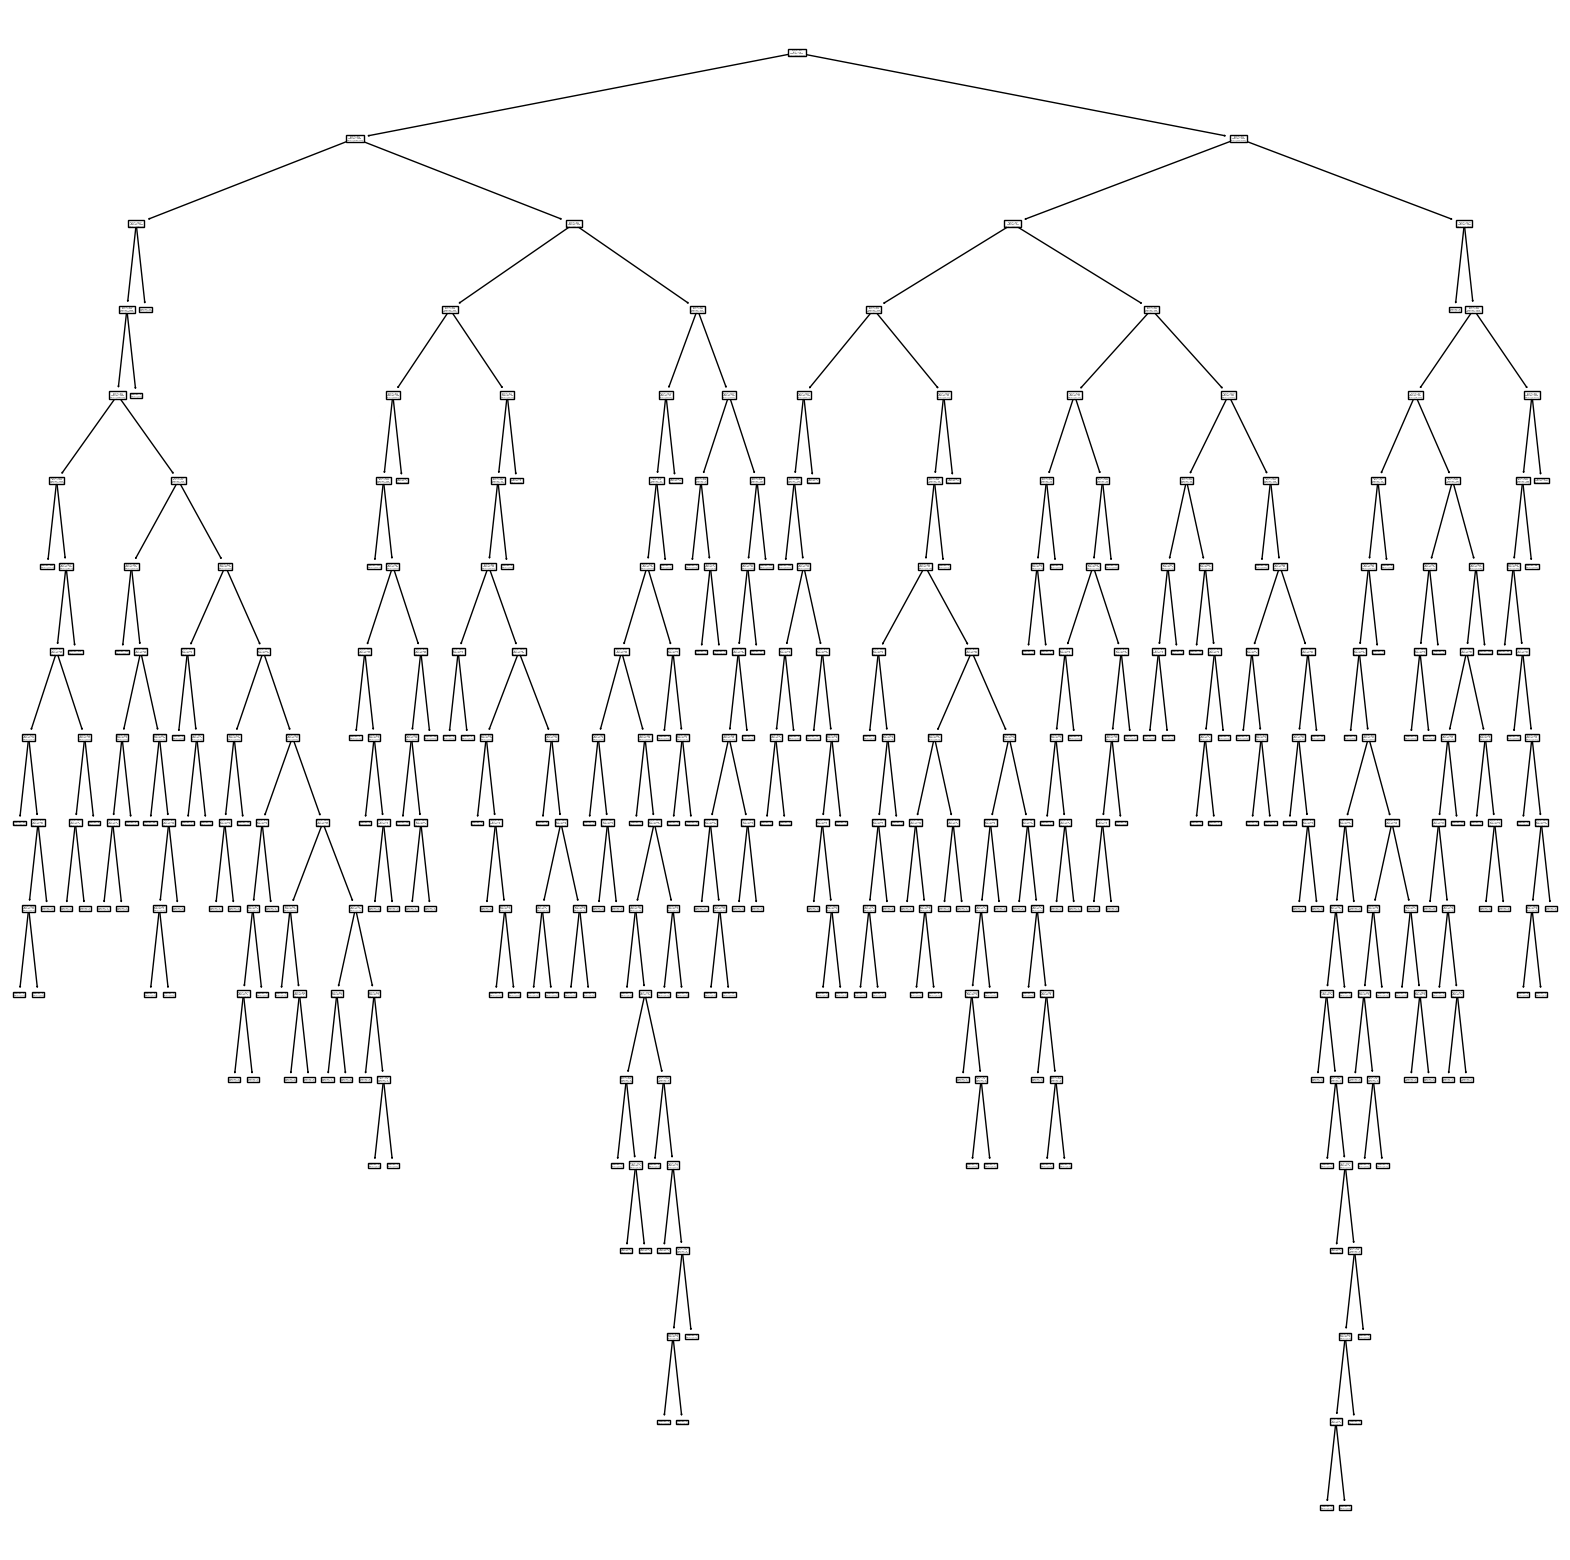

In [71]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dtc)
plt.show()

## Model 3: Naive Bayes

In [64]:
from sklearn import naive_bayes

bayas_method = naive_bayes.BernoulliNB()
bayas_method.fit(X_train, y_train)
y_pred_bayes = bayas_method.predict(X_test)
score_bayes = metrics.accuracy_score(y_pred_bayes, y_test)
print('Akurasi Prediksi Bayes : ',round(score_bayes,8), ' atau ',round(score_bayes*100,2),'%', sep='')

Akurasi Prediksi Bayes : 0.95904096 atau 95.9%


## Akuisisi Data

In [65]:
def get_conf_matriks(y_actual, y_predic, cmap = None, title='Tidak ada', ):
    confusion_matrix = metrics.confusion_matrix(y_actual, y_predic)
    ax = sn.heatmap(confusion_matrix, annot=True, fmt='g', cmap = cmap)
    ax.set_xlabel("Prediksi", fontsize=14, labelpad=20)
    ax.xaxis.set_ticklabels(['Salah', 'Benar'])
    ax.set_ylabel("Actual", fontsize=14, labelpad=20)
    ax.yaxis.set_ticklabels(['Salah', 'Benar'])
    ax.set_title(title, fontsize=14, pad=20)
    plt.show()
    
    conf_matrix_value = (confusion_matrix[0,0] + confusion_matrix[1,1]) / sum(sum(confusion_matrix))
    print("Hasil Confution Matriks :" , round(conf_matrix_value*100,2), "%", sep='')

### Matrix Confusion K-NN

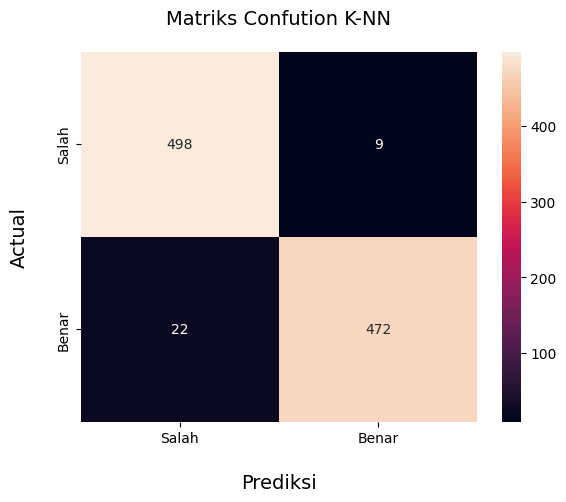

Hasil Confution Matriks :96.9%


In [68]:
import seaborn as sn

get_conf_matriks(y_test, y_pred_knn, title='Matriks Confution K-NN')

### Matrix Confusion Decision Tree

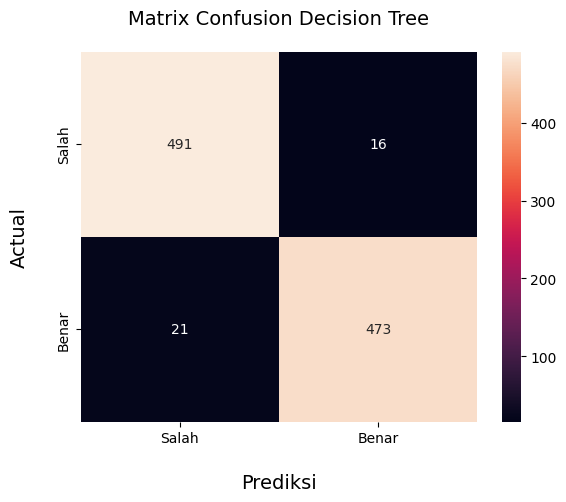

Hasil Confution Matriks :96.3%


In [76]:
get_conf_matriks(y_test, y_pred_tree, title='Matrix Confusion Decision Tree')

### Matrix Confusion Naive Bayes

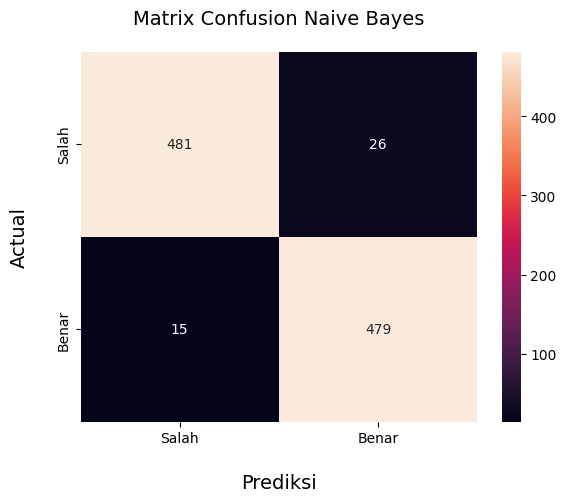

Hasil Confution Matriks :95.9%


In [75]:
get_conf_matriks(y_test, y_pred_bayes, title='Matrix Confusion Naive Bayes')

## Kesimpulan

Dari ketiga Model yang digunakan yaitu K-NN, Decision Tree, dan Naive Bayes untuk melakukan klasifikasi pada dataset. Dengan melihat akurasi dan hasil dari Confution Matriks dari ketiga Model. Maka Model yang terbaik untuk melakukan klasifikasi pada dataset yaitu Model K-NN dengan nilai akurasi 96.9%. Kita dapat Matrix Confusion dari K-NN berikut:

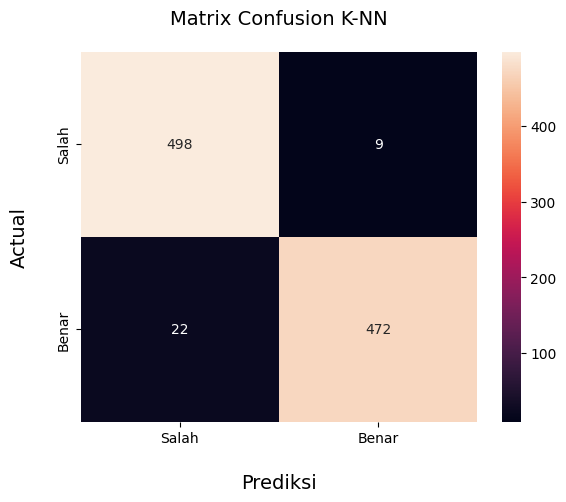

Hasil Confution Matriks :96.9%


In [74]:
get_conf_matriks(y_test, y_pred_knn, title='Matrix Confusion K-NN')

# 2. Regression

In [77]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [80]:
df2 = pd.read_csv("Salary_Data.csv")
df2.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [89]:
df.shape

(5001, 8)

In [88]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [85]:
df2.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [90]:
df2.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [96]:
X=df2.drop('Salary',axis=1)
y=df2.Salary
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [97]:
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

## Splitting the data

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.30)
print(X_train.shape)

(21, 1)


In [99]:
X_test.shape

(9, 1)

## Model: Linear Regression

In [100]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [101]:
LR.intercept_

26777.391341197625

In [102]:
LR.coef_ 

array([9360.26128619])

## Prediction

In [104]:
y_pred=LR.predict(X_test)
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

In [105]:
y_test

2      37731
28    122391
13     57081
10     63218
26    116969
24    109431
27    112635
11     55794
17     83088
Name: Salary, dtype: int64

## Evaluasi

1. Mean Absolute Error (MAE)

In [107]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 3737.417861878896


2. R-Square

In [110]:
R2=metrics.r2_score(y_test,y_pred)
print('R-Square: ', R2)

R-Square:  0.9740993407213511


3. Mean Square Error (MSE)

In [112]:
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))

MSE:  23370078.800832972


4. Root Mean Squared Error (RMSE)

In [114]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 4834.260936361728


# 3. Clustering

In [116]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the Iris dataset with pandas
dataset = pd.read_csv('Iris.csv')
x = dataset.iloc[:, [1, 2, 3, 4]].values

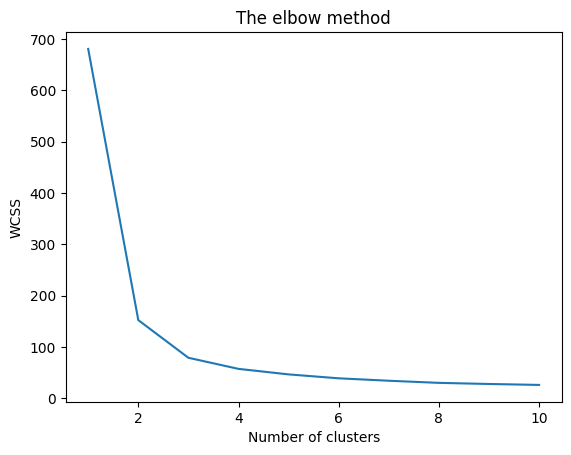

In [117]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [118]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

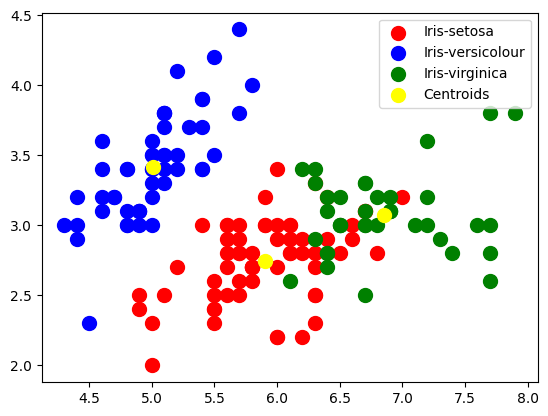

In [119]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()